Koder er hentet hovedsaklig fra Espen Sirnes sine notater og fra https://seaborn.pydata.org/generated/seaborn.regplot.html

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import pandas as pd

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://e24.no/spesial/skattelister/2020/5401/')
table_html=tables[0]


print(str(table_html)[:1000])

<table class="table table-sm"><thead><tr><th class="w-5"></th><th class="w-30">Navn</th><th class="text-right clickable">Inntekt<i class="material-icons md-14 middle"></i></th><th class="text-right clickable">Formue</th><th class="text-right clickable">Skatt</th></tr></thead><tbody><tr><td>1<!-- -->.</td><td><div class="name">BENEDICTE SIGRID BERG<!-- --> <!-- -->SCHILBRED</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/5401/">Tromsø</a>, f.<!-- --> <!-- -->1946</div></td><td class="text-right">22 811 592</td><td class="text-right">518 064 470</td><td class="text-right">9 856 942</td></tr><tr><td>2<!-- -->.</td><td><div class="name">BJØRNAR HALLSTEIN<!-- --> <!-- -->DANIELSEN</div><div class="text-muted"><a class="text-muted" href="/spesial/skattelister/2020/5401/">Tromsø</a>, f.<!-- --> <!-- -->1947</div></td><td class="text-right">18 971 820</td><td class="text-right">3 215 530</td><td class="text-right">6 023 447</td></tr><tr><td>3<!-- -->.</td><

In [10]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    
    table=[]
    for row in html.find_all('tr'):
        r=[]
        cells=row.find_all('td')
        
        if len(cells)==0:
            cells=row.find_all('th')
            
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])

    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

print(str(table)[:1000])

[['', 'Navn', 'Inntekt\ue5cf', 'Formue', 'Skatt'], ['1.', 'BENEDICTE SIGRID BERG SCHILBREDTromsø, f.1946', '22811592', '518064470', '9856942'], ['2.', 'BJØRNAR HALLSTEIN DANIELSENTromsø, f.1947', '18971820', '3215530', '6023447'], ['3.', 'ROAR DONSTromsø, f.1954', '16087630', '466128321', '9108653'], ['4.', 'EINAR SØRENSENTromsø, f.1951', '15011383', '86093233', '4050878'], ['5.', 'BERIT BREKMO TØLLEFSENTromsø, f.1959', '13628090', '25050145', '4505435'], ['6.', 'TROELS WALSTED HANSENTromsø, f.1976', '11898099', '6273045', '5326270'], ['7.', 'LIV ÅSE LINDRUPSENTromsø, f.1947', '11834931', '5099172', '2640883'], ['8.', 'TOR HARALD LINDRUPSENTromsø, f.1948', '11764685', '9430602', '2664120'], ['9.', 'ERIK MATHISENTromsø, f.1976', '11641156', '68190031', '4296212'], ['10.', 'LARS IVER MAGNE LARSENTromsø, f.1963', '11211420', '11786044', '3732898'], ['11.', 'SIGBJØRN ESPENESTromsø, f.1972', '10374454', '36206408', '3683318'], ['12.', 'RUNE HANSENTromsø, f.1973', '10241964', '94100605', '41

In [11]:
';'.join(table[0])

';Navn;Inntekt\ue5cf;Formue;Skatt'

In [12]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('skatteliste.csv',table)

In [13]:
Tabell=pd.read_csv('skatteliste.csv', delimiter=';')
Tabell=Tabell.rename(columns={'Inntekt': 'Inntekt'})
Tabell.pop('Unnamed: 0')
Tabell

,Navn,Inntekt,Formue,Skatt
0,"BENEDICTE SIGRID BERG SCHILBREDTromsø, f.1946",22811592,518064470,9856942
1,"BJØRNAR HALLSTEIN DANIELSENTromsø, f.1947",18971820,3215530,6023447
2,"ROAR DONSTromsø, f.1954",16087630,466128321,9108653
3,"EINAR SØRENSENTromsø, f.1951",15011383,86093233,4050878
4,"BERIT BREKMO TØLLEFSENTromsø, f.1959",13628090,25050145,4505435
5,"TROELS WALSTED HANSENTromsø, f.1976",11898099,6273045,5326270
6,"LIV ÅSE LINDRUPSENTromsø, f.1947",11834931,5099172,2640883
7,"TOR HARALD LINDRUPSENTromsø, f.1948",11764685,9430602,2664120
8,"ERIK MATHISENTromsø, f.1976",11641156,68190031,4296212
9,"LARS IVER MAGNE LARSENTromsø, f.1963",11211420,11786044,3732898


In [14]:
Tabell.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Navn     20 non-null     object
 1   Inntekt  20 non-null     int64 
 2   Formue   20 non-null     int64 
 3   Skatt    20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


In [15]:
from statsmodels.regression.linear_model import OLS

res=OLS(Tabell['Formue'].astype(float), Tabell['Skatt'].astype(float)).fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Formue   R-squared (uncentered):                   0.590
Model:                            OLS   Adj. R-squared (uncentered):              0.568
Method:                 Least Squares   F-statistic:                              27.34
Date:                Thu, 31 Mar 2022   Prob (F-statistic):                    4.79e-05
Time:                        13:18:25   Log-Likelihood:                         -397.95
No. Observations:                  20   AIC:                                      797.9
Df Residuals:                      19   BIC:                                      798.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

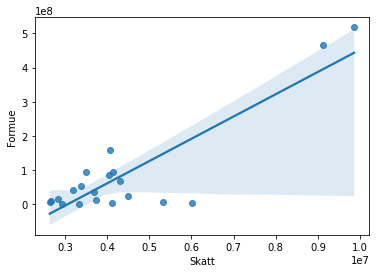

In [17]:
import seaborn as sns


sns.regplot(x = 'Skatt', y= 'Formue', data = Tabell);

Vi ser tydlig at det er en positiv korreleasjon mellom formue og skatt. Dette kommer av at vi i Norge betaler skatt prosentvis og da vil de som har større formue betale mer skatt. Skatten i Norge kommer mest fra inntekten derfor vil vi se noen med liten formue betale mye skatt.